In [69]:
# Classify polarized reviews as either bad or good

In [70]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [71]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [72]:
np.shape(train_data)

(25000,)

In [73]:
train_data[2500]

[1,
 13,
 69,
 115,
 557,
 7,
 14,
 509,
 466,
 4,
 2025,
 8,
 742,
 7502,
 625,
 1169,
 1055,
 5,
 29,
 739,
 11,
 6,
 55,
 163,
 696,
 227,
 5,
 27,
 2,
 1502,
 167,
 2156,
 6504,
 433,
 75,
 1637,
 14,
 56,
 11,
 6,
 2,
 3979,
 18,
 470,
 3816,
 2280,
 2512,
 33,
 15,
 51,
 6,
 1758,
 5,
 2211,
 866,
 21,
 95,
 146,
 7,
 4,
 652,
 15,
 48,
 1024,
 2023,
 4732,
 9,
 11,
 12,
 25,
 191,
 30,
 685,
 14,
 16,
 55,
 2781,
 7,
 148,
 8002,
 1290,
 39,
 1831,
 11,
 4,
 3065,
 608,
 19,
 53,
 5401,
 14,
 9,
 35,
 9694,
 5,
 33,
 211,
 5565,
 2,
 163,
 22,
 4,
 779,
 5436,
 93,
 72,
 462,
 38,
 254,
 13,
 16,
 2578,
 382,
 4,
 1529,
 361,
 7,
 2,
 11,
 20,
 479,
 279,
 12,
 16,
 4,
 364,
 1398,
 13,
 69,
 170,
 11,
 21,
 13,
 296,
 19,
 6,
 604,
 7,
 84,
 5,
 75,
 69,
 6,
 5154,
 118,
 457,
 207,
 1084,
 11,
 2088]

In [74]:
max([max(sequence) for sequence in train_data])

9999

In [75]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [76]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [77]:
np.shape(train_data)

(25000,)

In [78]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [79]:
###Preparing the data --> use one-hot encode

In [80]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [81]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [82]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [83]:
# vectorize the labels as well. 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [84]:
##Building a neural network##
## rem, the input data is a vector, the output is a scalar (of values 0's and 1's)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [85]:
# Data Validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [86]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 30ms/step - loss: 0.5249 - accuracy: 0.7787 - val_loss: 0.3947 - val_accuracy: 0.8637
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3196 - accuracy: 0.8941 - val_loss: 0.3091 - val_accuracy: 0.8864
Epoch 3/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2395 - accuracy: 0.9189 - val_loss: 0.3038 - val_accuracy: 0.8779
Epoch 4/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1909 - accuracy: 0.9361 - val_loss: 0.2931 - val_accuracy: 0.8804


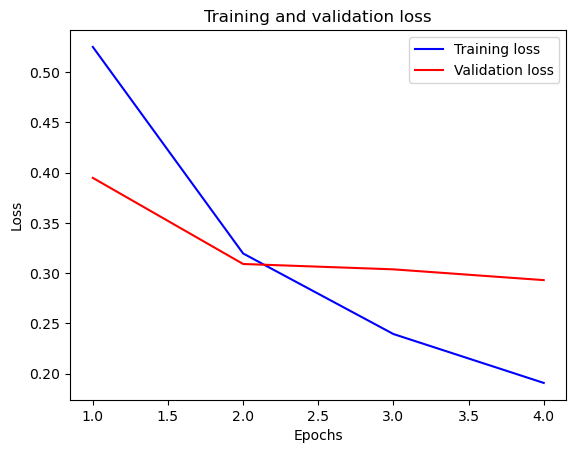

In [87]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, loss_values, 'b', label = 'Training loss') #'b'is for blue line
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

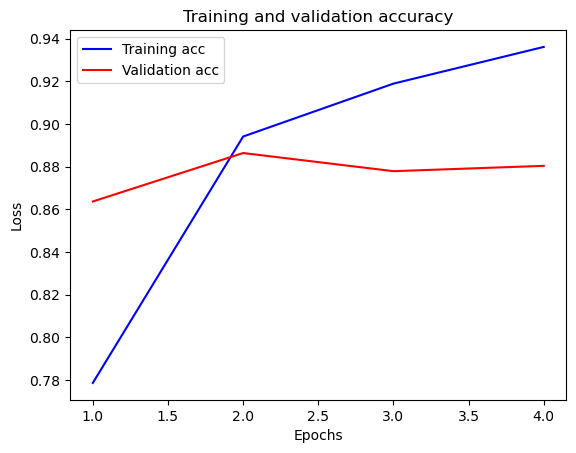

In [88]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
model_result = model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


In [90]:
model_result

array([[0.20847894],
       [0.99646723],
       [0.78310156],
       ...,
       [0.07498509],
       [0.11920675],
       [0.44583133]], dtype=float32)